Q1:

In [21]:
'''
Given P(C)i=1∏n​P(xi​∣C)
 And status in [junior, senior]
 And

    department age salary status count
sales 31_35 46K_50K senior 30
sales 26_30 26K_30K junior 40
sales 31_35 31K_35K junior 40
systems 21_25 46K_50K junior 20
systems 31_35 66K_70K senior 5
systems 26_30 46K_50K junior 3
systems 41_45 66K_70K senior 3
marketing 36_40 46K_50K senior 10
marketing 31_35 41K_45K junior 4
secretary 46_50 36K_40K senior 4
secretary 26_30 26K_30K junior 6

--- P(status overall) ---
 P(junior) = 6/11
 P(senior) = 5/11

--- P(department) ---
 P(sales | senior) = 1/5
 P(sales | junior) = 2/6
 P(systems | senior) = 2/5
 P(systems | junior) = 2/6
 P(marketing | senior) = 1/5
 P(marketing | junior) = 1/6
 P(secretary | senior) = 1/5
 P(secretary | junior) = 1/6

 --- P(age) ---
 P(21_25 | senior) = 0
 P(21_25 | junior) = 1/6
 P(26_30 | senior) = 0
 P(26_30 | junior) = 3/6
 P(31_35 | senior) = 2/5
 P(31_35 | junior) = 2/6
 P(36_40 | senior) = 1/5
 P(36_40 | junior) = 0
 P(41_45 | senior) = 1/5
 P(41_45 | junior) = 0
 P(46_50 | senior) = 1/5
 P(46_50 | junior) = 0

--- P(salary) ---
 P(26_30k | senior) = 0
 P(26_30k | junior) = 2/6
 P(31_35k | senior) = 0
 P(31_35k | junior) = 1/6
 P(36_40k | senior) = 1/5
 P(36_40k | junior) = 0
 P(41_45k | senior) = 0
 P(41_45k | junior) = 1/6
 P(46_50k | senior) = 2/5
 P(46_50k | junior) = 2/6
 P(66_70k | senior) = 2/5
 P(66_70k | junior) = 0

--- P(status) ---
 P(senior | (systems, 26_30, 46K_50K)) =  5/11 * 2/5 * 0 * 2/5 = 0
 P(junior | (systems, 26_30, 46K_50K)) =  6/11 * 2/6 * 3/6 * 2/6 = 0.03
 '''

IndentationError: unexpected indent (445546659.py, line 1)

Q2

In [22]:
from sklearn import svm
import pandas as pd
import numpy as np

data=pd.read_csv("./diabetes_train.csv")
m,n=data.shape

X=data.iloc[:-10, :-1].to_numpy() # Apparently the current pandas has no as_matrix
y=data.iloc[:-10,-1].to_numpy()

C=1e+03
gamma=1e-05
clf = svm.SVC(C=C, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=gamma, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf.fit(X, y)

,C,1000.0
,kernel,'rbf'
,degree,3
,gamma,1e-05
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
testX=data.iloc[-10:, :-1].to_numpy()
testy=data.iloc[-10:, -1].to_numpy()

pred=clf.predict(testX)
for i in range(10):
    print(pred[i], testy[i])
    
clf.support_vectors_.shape

tested_positive tested_positive
tested_positive tested_positive
tested_negative tested_positive
tested_negative tested_negative
tested_negative tested_negative
tested_positive tested_positive
tested_positive tested_positive
tested_negative tested_positive
tested_negative tested_negative
tested_negative tested_positive


(380, 8)

Q3

'''
  x1 x2
a 2 10
b 2 5
c 8 4
d 5 8
e 7 5
f 6 4
g 1 2
h 4 9


 If h and c are clusters. the initial analysis looks like this:
 For point a
 Distance to c = |2-8| + |10-4| = 12
 Distance to h = |2-4| + 10-9| = 3
 Assign to cluster h
 Repeating for the rest, assignments are:
 a -> h
 b -> h
 c -> cluster center (c)
 d -> h
 e -> c 
 f -> c
 g -> c
 h -> cluster center (h)
 
 Centroids (median) the calculations look like this:
 c (means) = ((8+7+6+1)/4, (5+4+2+ 2)/4) = (5.5, 3.75)
 h (means) = ((2+2+5+4)/4 +(10+5+8+9)/4) = (3.25, 8)

 Reassigning memberships as centroids 1 & 2:
 a -> 2
 b -> 2
 c -> 1
 d -> 2
 e -> 1 
 f -> 1
 g -> 1
 h -> 2
'''

Q4

In [24]:
'''
  a b c d e f g
b 5
c 8 6
d 4 4 5
e 7 5 1 4
f 7 4 2 4 1
g 8 3 7 7 7 5
h 2 4 6 1 5 5 8
(a) Perform hierarchical clustering using single link measure for the above and draw the final dendrogram.
(b) Determine whether a point is core based on ε = 6 and minP ts = 2. (Recall that a point p is a core point if at
least minP ts points are within distance ε of it (including p).)
'''

'\n  a b c d e f g\nb 5\nc 8 6\nd 4 4 5\ne 7 5 1 4\nf 7 4 2 4 1\ng 8 3 7 7 7 5\nh 2 4 6 1 5 5 8\n(a) Perform hierarchical clustering using single link measure for the above and draw the final dendrogram.\n(b) Determine whether a point is core based on ε = 6 and minP ts = 2. (Recall that a point p is a core point if at\nleast minP ts points are within distance ε of it (including p).)\n'

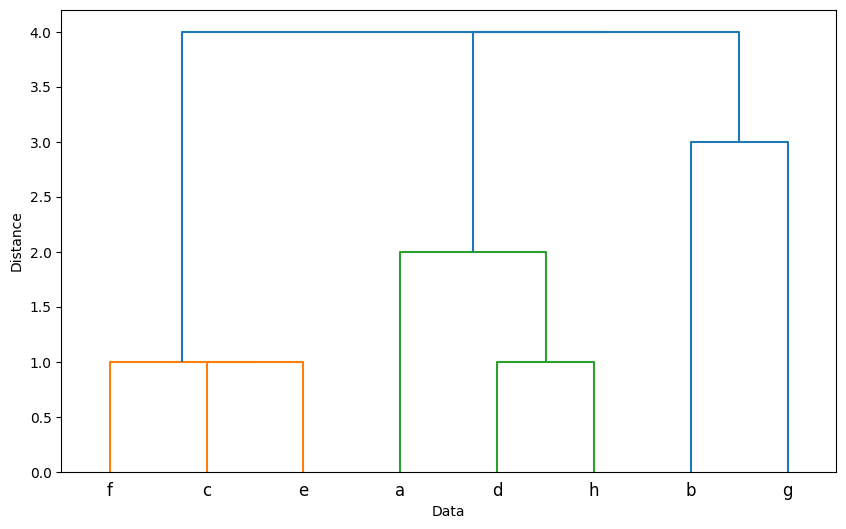

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

labels = ["a", "b", "c", "d", "e", "f", "g", "h"]

data = np.array([
    [0, 5, 8, 4, 7, 7, 8, 2],
    [5, 0, 6, 4, 5, 4, 3, 4],
    [8, 6, 0, 5, 1, 2, 7, 6],
    [4, 4, 5, 0, 4, 4, 7, 1],
    [7, 5, 1, 4, 0, 1, 7, 5],
    [7, 4, 2, 4, 1, 0, 5, 5],
    [8, 3, 7, 7, 7, 5, 0, 8],
    [2, 4, 6, 1, 5, 5, 8, 0]
])

top_half = squareform(data)

links = linkage(top_half, method="single")

plt.figure(figsize=(10, 6))
dendrogram(links, labels=labels)
plt.xlabel("Data")
plt.ylabel("Distance")
plt.show()


In [26]:
'''
a is core to b,d,h
b is core to a,c,d,e,f,g,h
c is core to b,d,e,f,g,h
d is core to a,b,c,e,f,g,h
e is core to b,c,d,h
f is core to b,c,d,g,h
g is core to b,c,d,f,h
h is core to a,b,c,d,e,f,g

All are core points if  ε = 6 and minP ts = 2
'''

'\na is core to b,d,h\nb is core to a,c,d,e,f,g,h\nc is core to b,d,e,f,g,h\nd is core to a,b,c,e,f,g,h\ne is core to b,c,d,h\nf is core to b,c,d,g,h\ng is core to b,c,d,f,h\nh is core to a,b,c,d,e,f,g\n\nAll are core points if  ε = 6 and minP ts = 2\n'